In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#read from csv file 
df = pd.read_csv('data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:

X = df.drop(columns=['diagnosis','Unnamed: 32'],axis=1)
y = df.diagnosis

In [4]:
len(df)

569

In [5]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
col =list(df.columns)

In [7]:
col.remove('Unnamed: 32')
col.remove('diagnosis')
col

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

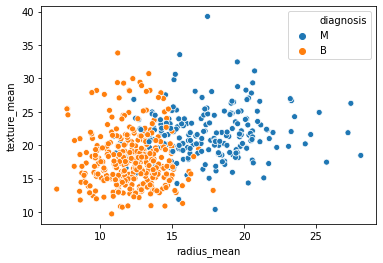

In [8]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=df,hue='diagnosis')

In [10]:
# UnderSample_based_on_Clustering
from imblearn.under_sampling import ClusterCentroids
CC = ClusterCentroids(random_state=42,ratio=1) 
new_X, new_y = CC.fit_resample(X, y)



In [11]:
pd.Series(new_y).value_counts()

B    212
M    212
dtype: int64

In [12]:
new_df = pd.DataFrame(new_X,columns=col)
new_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8.940557e+05,12.070,13.883333,76.723333,450.70,0.082807,0.043383,0.009791,0.006794,0.157367,...,12.843333,16.35,82.436667,508.366667,0.106567,0.088483,0.047927,0.031170,0.253333,0.065483
1,9.010343e+08,10.988,18.195000,69.620000,385.25,0.087630,0.043030,0.014147,0.009754,0.151700,...,12.870000,23.00,81.305000,512.650000,0.113115,0.074085,0.058991,0.033435,0.234350,0.068285
2,8.914360e+07,14.410,19.730000,96.030000,651.00,0.087570,0.167600,0.136200,0.066020,0.171400,...,15.770000,22.13,101.700000,767.300000,0.099830,0.247200,0.222000,0.102100,0.227200,0.087990
3,8.911817e+06,13.720,16.510000,87.615000,579.85,0.087320,0.058700,0.032380,0.024745,0.184150,...,15.240000,23.92,98.640000,704.550000,0.111750,0.124310,0.125800,0.075890,0.264500,0.065875
4,8.710015e+08,13.000,20.780000,83.510000,519.40,0.113500,0.075890,0.031360,0.026450,0.254000,...,14.160000,24.11,90.820000,616.700000,0.129700,0.110500,0.081120,0.062960,0.319600,0.064350


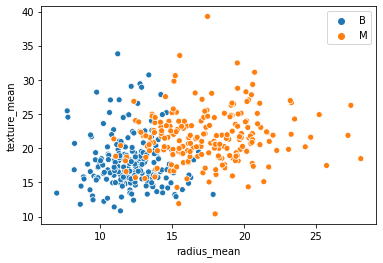

In [13]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=new_df,hue=new_y)